# Simple Linear Regression

The housing dataset contains information about different houses in Boston. Data is available from the scikit-learn library. The objective is to predict the value of prices of the house using the given features.

In [28]:
#import libraries and read dataset

import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.datasets import load_boston
import numpy as np

boston = pd.read_csv('boston.csv')
boston.head(5)

#Boston dataset variables
#medv: median house value
#rm: average number pf rooms per dwelling

,rm,medv
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


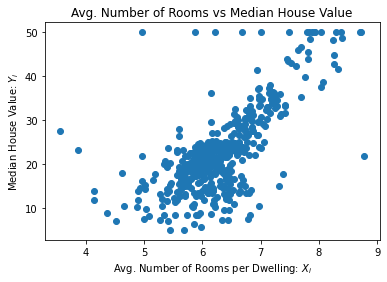

In [3]:
#Plotting the dataset

plt.scatter(boston.rm, boston.medv)
plt.xlabel("Avg. Number of Rooms per Dwelling: $X_i$")
plt.ylabel("Median House Value: $Y_i$")
plt.title("Avg. Number of Rooms vs Median House Value")
plt.show()

In [5]:
# Split dataset into target values Y and predictor values X
X = boston.drop('medv', axis=1)
Y = boston['medv']


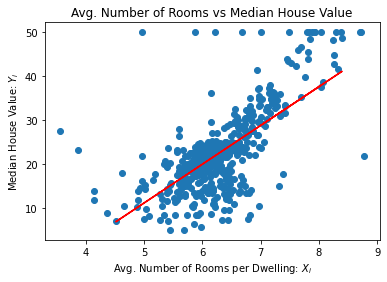

In [7]:
# Split the dataset into train and test data
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.3, random_state = 5)

# Run linear regression
lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)


plt.scatter(X, Y)
plt.plot(X_test, Y_pred, 'red')
plt.xlabel("Avg. Number of Rooms per Dwelling: $X_i$")
plt.ylabel("Median House Value: $Y_i$")
plt.title("Avg. Number of Rooms vs Median House Value")
plt.show()


In [8]:
# Mean squared error
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

46.68491330777207


In [9]:
# R-square
lm.score(X_test, Y_test)

0.5090306525796444

In [10]:
print('intercept:', lm.intercept_)
print('slope:', lm.coef_)


intercept: -33.033754823067994
slope: [8.82822236]


# Multiple Linear Regression

In [33]:

boston_dataset = load_boston()
print(boston_dataset.keys())

#Boston dataset variables
#data: contains the information for various houses
#target: prices of the house
#feature_names: names of the features
#DESCR: describes the dataset

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [34]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [35]:
boston['MEDV'] = boston_dataset.target

In [36]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

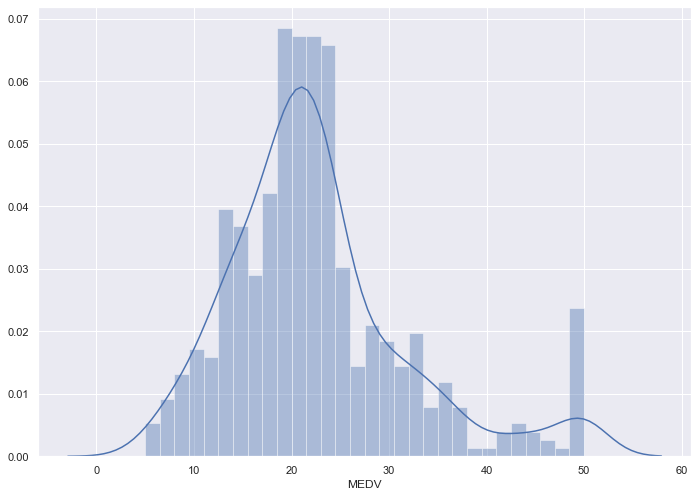

In [38]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

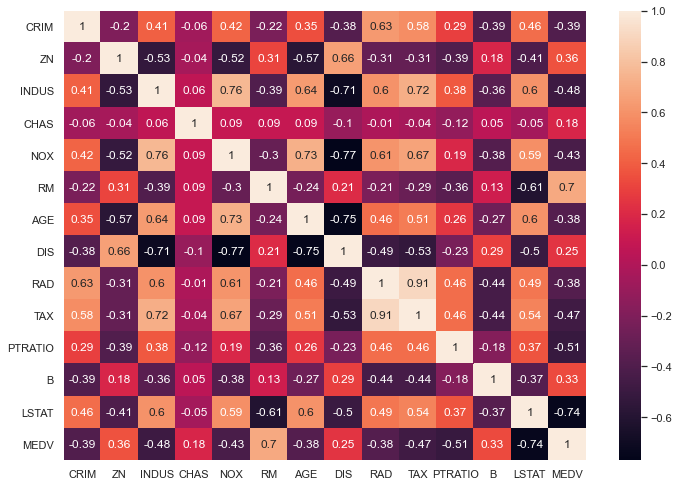

In [39]:
#Correlation matrix
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()


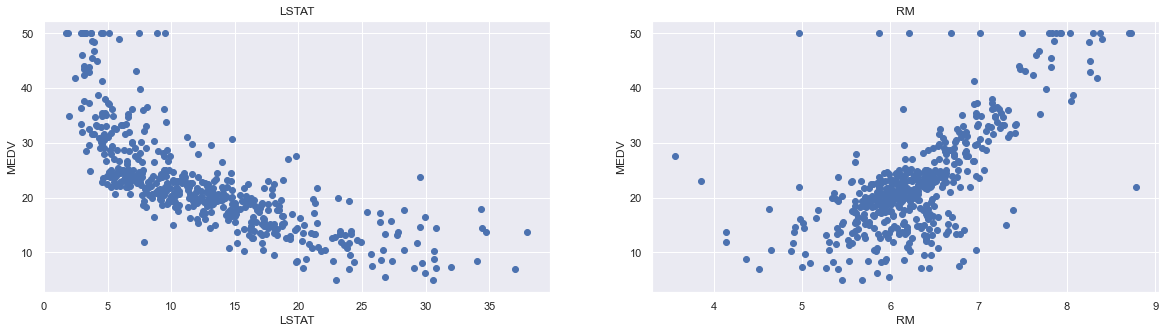

In [40]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [41]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns=['LSTAT', 'RM'])
Y = boston['MEDV']

In [42]:


X_train, X_test, Y_train, Y_test  = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [47]:


lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [52]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(sklearn.metrics.mean_squared_error(Y_train, y_train_predict)))
r2 = lin_model.score(X_train, Y_train)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(sklearn.metrics.mean_squared_error(Y_test, y_test_predict)))
r2 = lin_model.score(X_test, Y_test)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.13740078470291
R2 score is 0.6628996975186954


In [ ]:
#Intercept and Coeficientes
print(lin_model.intercept_)
print(lin_model.coef_)